## L3 - convolutions and filters

In [80]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [81]:
import os
import shutil
import math

from IPython.display import display
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import wfdb

In [82]:
# Convolution
a = [-1, 2, -1]; b = [1, 2, 3, 4]
c = np.convolve(a, b, "full") # no crop
d = np.convolve(a, b, "valid") # cropped
print(c)
print(d)

[-1  0  0  0  5 -4]
[0 0]


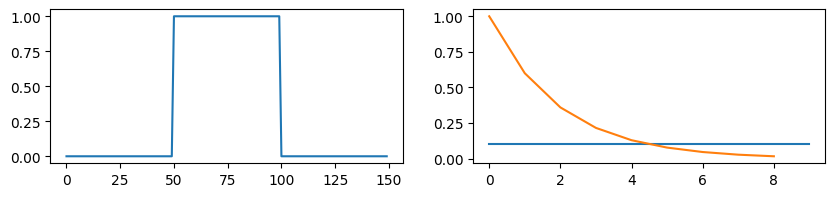

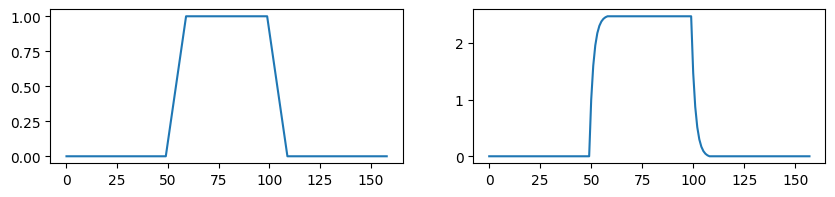

In [83]:
# More convolution
a = np.concatenate([np.zeros(50), np.ones(50), np.zeros(50)]) # square pulse
b = 0.1 * np.ones(10) # uniform
c = 0.6 ** np.arange(0, 9) # exponential

figsize(10, 2)
plt.subplot(1,2,1)
plt.plot(a)
plt.subplot(1,2,2)
plt.plot(b)
plt.plot(c)
plt.show()

plt.subplot(1,2,1)
plt.plot(np.convolve(a, b))
plt.subplot(1,2,2)
plt.plot(np.convolve(a, c))
plt.show()

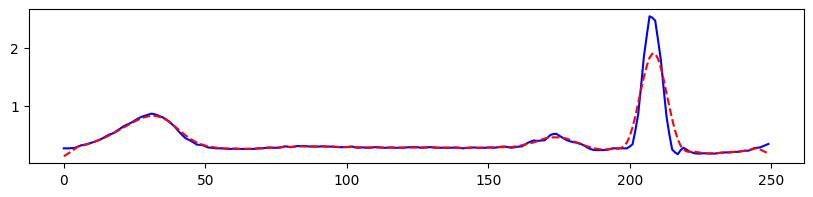

In [84]:
record = wfdb.rdrecord("../data/20011/s20011", sampto=1000)
sig = record.p_signal[:record.fs*1, 0]
conv = np.convolve(sig, b, "same")
plt.plot(sig, "b")
plt.plot(conv, "r--")

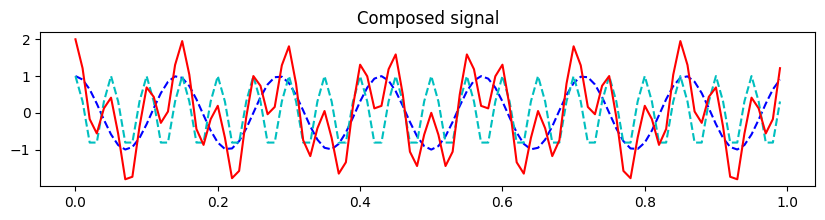

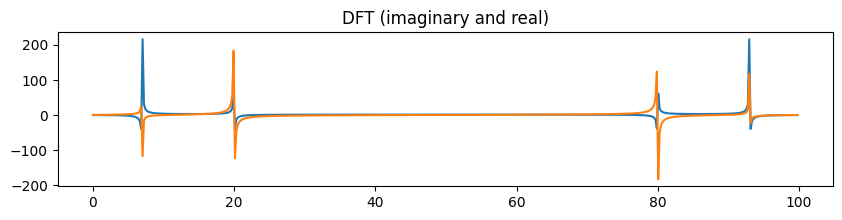

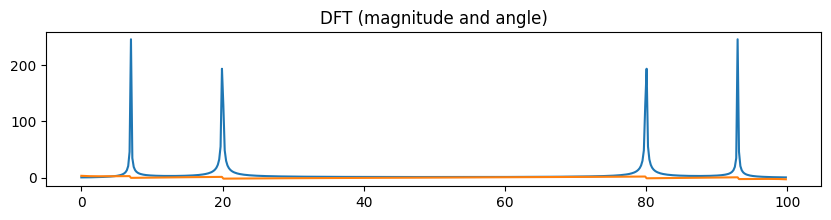

Text(0.5, 1.0, 'DFT (power)')

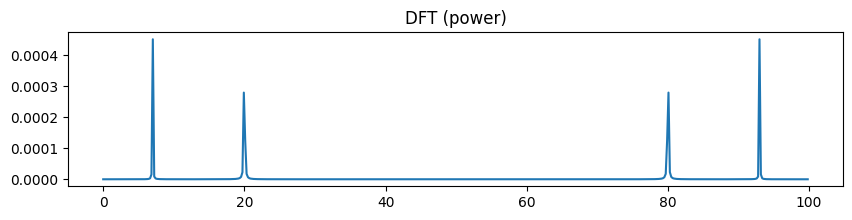

In [85]:
# Fourier transform

# construct a signal from some sinusoids
fs = 100
N = 512
t = np.arange(0, N) / fs # time interval
f = np.arange(0, N) / N * fs # possible frequencies to compute

# y = cos @ 7Hz + cos @ 20 Hz
x1 = np.cos(2*math.pi*7*t)
x2 = np.cos(2*math.pi*20*t)
y = x1 + x2
plt.plot(t[:100], x1[:100], "b--")
plt.plot(t[:100], x2[:100], "c--")
plt.plot(t[:100], y[:100], "r")
plt.title("Composed signal"); plt.show()

# dft
Y = np.fft.fft(y)
# note: the "fake" periodic repetiton outside the range for which we can compute valid frequencies (>= 80)
plt.plot(f, Y.real)
plt.plot(f, Y.imag)
plt.title("DFT (imaginary and real)"); plt.show()
plt.plot(f, np.abs(Y))
plt.plot(f, np.angle(Y)) # note: we didn't introduce any phase shifts
plt.title("DFT (magnitude and angle)"); plt.show()
Ypow = 1/N * np.abs(Y/N) ** 2
plt.plot(f, Ypow); plt.title("DFT (power)") 


In [132]:
# in a function

def showspec(y, fc, n=None):
    N = len(y) if n is None else n
    f = np.arange(0, N) / N * fs
    half = np.arange(0, N/2).astype(int)
    
    Y = np.fft.fft(y, n=N)

    plt.plot(f[half], np.abs(Y[half]))
    plt.plot(f[half], np.angle(Y[half])) # note: we didn't introduce any phase shifts
    plt.title("DFT (magnitude and angle)"); plt.show()
    Ypow = 1/N * np.abs(Y/N) ** 2
    plt.plot(f[half], Ypow[half]); plt.title("DFT (power)"); plt.show()
    

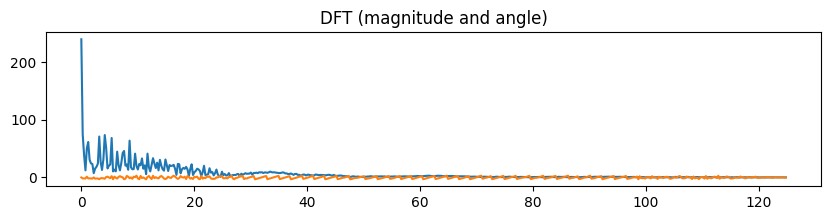

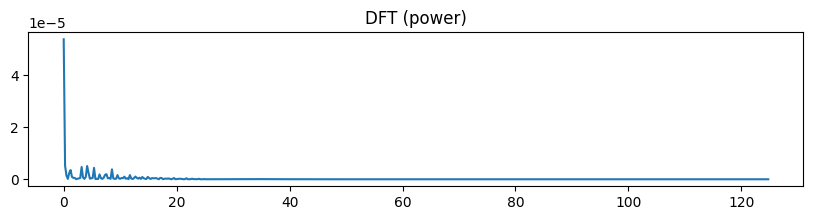

In [87]:
# dft on the record signal

record = wfdb.rdrecord("../data/20011/s20011", sampto=5000)
sig = record.p_signal[:1024, 0]
fs = record.fs # 250

showspec(sig, fs)

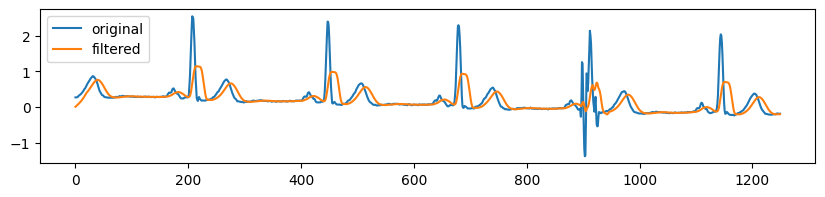

(-1.0, 2.0)

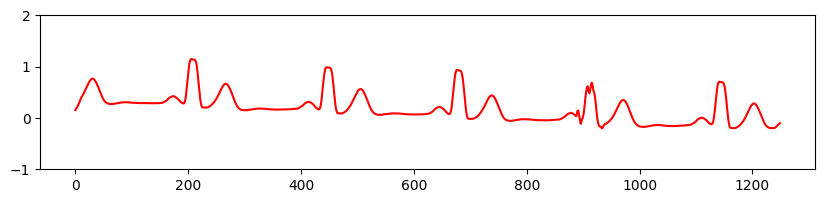

In [101]:
# MOVING AVERAGE FILTER

record = wfdb.rdrecord("../data/20011/s20011", sampto=250*5)
sig = record.p_signal[:, 0]
fs = record.fs # 250

M = 20 # rolling avg window size
b = np.ones(M) / M
a = 1
fsig = sp.signal.lfilter(b, a, sig)
plt.plot(sig, label="original")
plt.plot(fsig, label="filtered")
plt.legend(); plt.show()

# or achieve the same with x(t) conv h(t) if impulse response h(t) is known
h = b # in this case
convsig = np.convolve(sig, h, "same")
plt.plot(convsig, "r"); plt.ylim((-1,2))


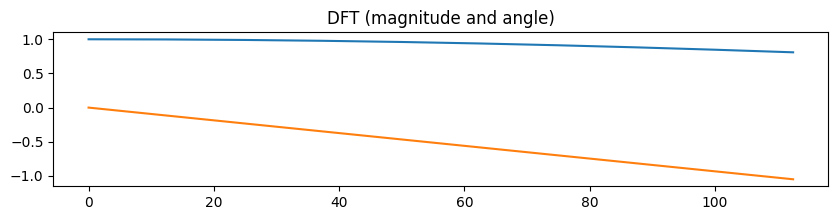

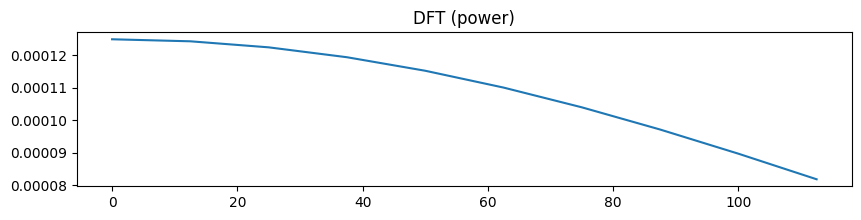

In [111]:
# impulse response in frequency domain   h[n] <-> H(e^(jw))

N = 512
Hw = np.fft.fft(h, n=N) # "force" 512 bands
showspec(h, fs, n=N)

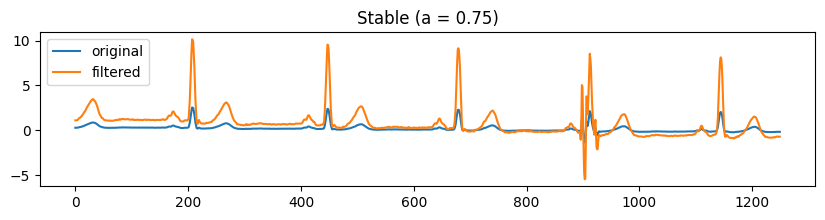

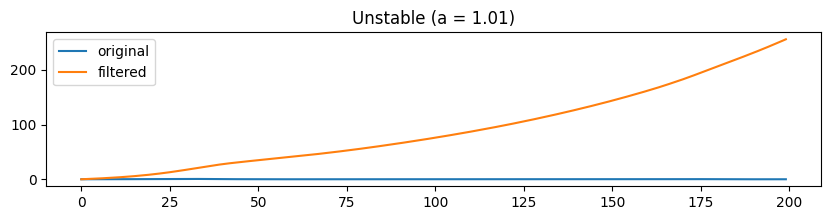

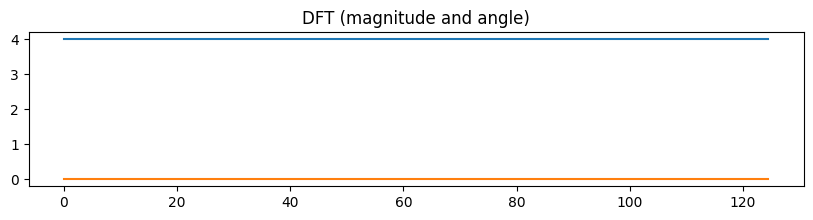

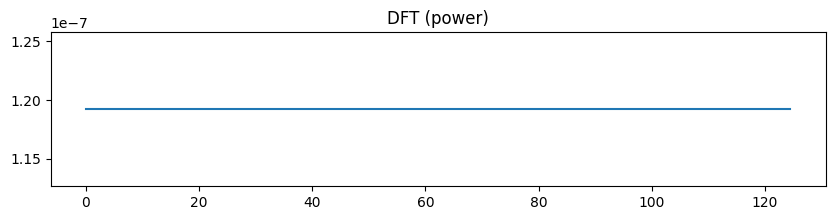

In [134]:
# LEAKY INTEGRATOR IIR FILTER   y[n] = a * y[n-1] + x[n]

record = wfdb.rdrecord("../data/20011/s20011", sampto=250*5)
sig = record.p_signal[:, 0]
fs = record.fs # 250

alpha = 0.75
b = [1]
a = [1 -alpha]

# Stable
fsig = sp.signal.lfilter(b, a, sig)
plt.plot(sig, label="original")
plt.plot(fsig, label="filtered")
plt.legend(); plt.title("Stable (a = 0.75)"); plt.show()

# Unstable
fsig = sp.signal.lfilter(b, [1, -1.01], sig)
plt.plot(sig[:200], label="original")
plt.plot(fsig[:200], label="filtered")
plt.legend(); plt.title("Unstable (a = 1.01)"); plt.show()

# Impulse response
N = 512
alpha = 0.75
b = [1]
a = [1 -alpha]
imp = np.zeros(N); imp[0] = 1
impres = sp.signal.lfilter(b, a, imp)
showspec(impres, fs, n=N)

# SOMETHING WRONG HERE





In [ ]:
# Second order IIR

